<a href="https://colab.research.google.com/github/liliane-sougarc/womakerscode-Data-Analytics/blob/main/ENIAC_Desafio3_Rename.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando Bibliotecas

In [1]:
!pip install pandas pydataset matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 33.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=0b1e1bd3795cfa05e912dc462f13fb74f93349251e1edb225ef81687c470fd9d
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset


# Importando as Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando o Dataset

In [3]:
# Exemplo de como carregar um dataset do pydataset
from pydataset import data
df = data('HairEyeColor')

# Visualizar as primeiras linhas
df.head()


initiated datasets repo at: /root/.pydataset/


,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


# Renomear Colunas e Categorias

In [4]:
# Renomear as colunas
df = df.rename(columns={
    "Hair": "Cor do Cabelo",
    "Eye": "Cor dos Olhos",
    "Sex": "Gênero",
    "Freq": "Total de Pessoas"
})

# Substituir os valores nas colunas 'Cor do Cabelo' e 'Cor dos Olhos'
df["Cor do Cabelo"] = df["Cor do Cabelo"].replace({
    "Black": "Preto",
    "Brown": "Castanho",
    "Blond": "Loiro",
    "Red": "Ruivo"
})

df["Cor dos Olhos"] = df["Cor dos Olhos"].replace({
    "Brown": "Castanho",
    "Blue": "Azul",
    "Hazel": "Avelã",
    "Green": "Verde"
})

# Substituir os valores na coluna 'Gênero'
df["Gênero"] = df["Gênero"].replace({
    "Male": "Masculino",
    "Female": "Feminino"
})

# Verificar as primeiras linhas para garantir que os renomeios funcionaram
df.head()


,Cor do Cabelo,Cor dos Olhos,Gênero,Total de Pessoas
1,Preto,Castanho,Masculino,32
2,Castanho,Castanho,Masculino,53
3,Ruivo,Castanho,Masculino,10
4,Loiro,Castanho,Masculino,3
5,Preto,Azul,Masculino,11


# Análise Descritiva do dataset com pandas

In [32]:
print("Dimensões do dataset:", df.shape)
print("\nTipos de dados:\n", df.dtypes)
print("\nResumo estatístico:\n", df.describe())
print("\nValores nulos:\n", df.isnull().sum())

# Somando os valores da coluna de Total de pessoas
total_pessoas = df['Total de Pessoas'].sum()
print(f'Total de pessoas analisadas: {total_pessoas}')

# Somando o número de pessoas do gênero masculino
homens = df[df['Gênero'] == 'Masculino']['Total de Pessoas'].sum()
print(f'Total de homens analisados: {homens}')


# Somando o número de pessoas do gênero feminino
mulheres = df[df['Gênero'] == 'Feminino']['Total de Pessoas'].sum()
print(f'Total de mulheres analisadas: {mulheres}')





Dimensões do dataset: (32, 4)

Tipos de dados:
 Cor do Cabelo       object
Cor dos Olhos       object
Gênero              object
Total de Pessoas     int64
dtype: object

Resumo estatístico:
        Total de Pessoas
count         32.000000
mean          18.500000
std           18.242099
min            2.000000
25%            7.000000
50%           10.000000
75%           29.250000
max           66.000000

Valores nulos:
 Cor do Cabelo       0
Cor dos Olhos       0
Gênero              0
Total de Pessoas    0
dtype: int64
Total de pessoas analisadas: 592
Total de homens analisados: 279
Total de mulheres analisadas: 313


# 📊 Gráficos para visualizar a distribuição das variáveis

<ipython-input-30-17d10d8f5ae9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_cabelo.index, y=distribuicao_cabelo.values, palette=cores_cabelo)
<ipython-input-30-17d10d8f5ae9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_olhos.index, y=distribuicao_olhos.values, palette=cores_olhos)


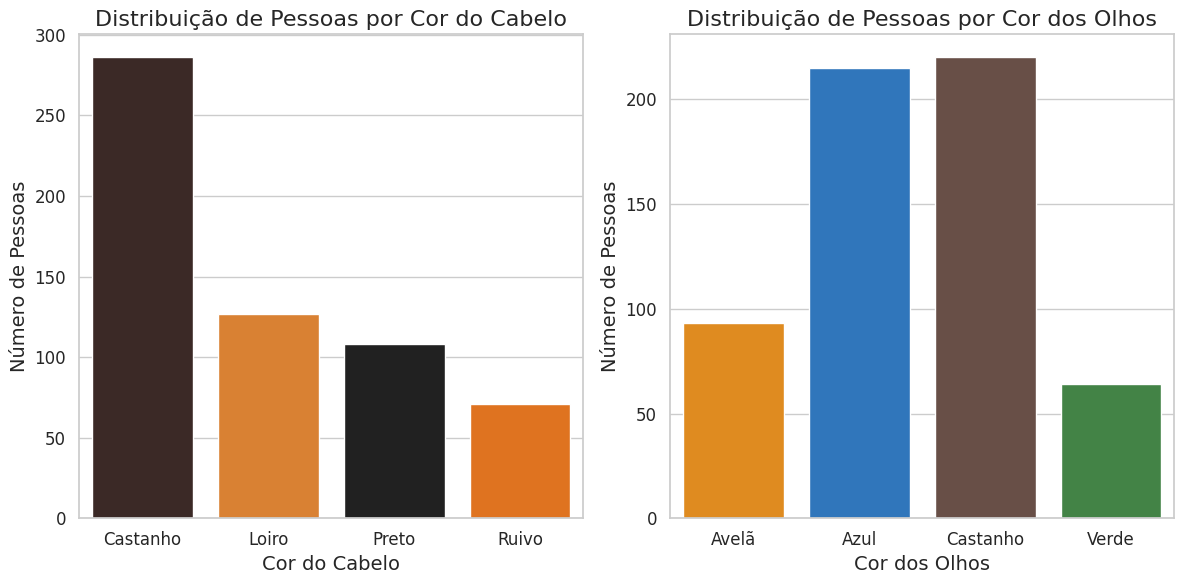

In [30]:
# Definir as cores reais para as variáveis
cores_cabelo = {
    'Castanho': '#3E2723',  # cor de cabelo castanho
    'Loiro': '#F57F17',     # cor de cabelo loiro
    'Preto': '#212121',     # cor de cabelo preto
    'Ruivo': '#FF6F00'      # cor de cabelo ruivo
}

cores_olhos = {
    'Castanho': '#6D4C41',  # cor de olhos castanho
    'Azul': '#1976D2',      # cor de olhos azul
    'Avelã': '#FF8F00',     # cor de olhos avelã
    'Verde': '#388E3C'      # cor de olhos verde
}

# Agrupar o total de pessoas por Cor do Cabelo e Cor dos Olhos
distribuicao_cabelo = df.groupby('Cor do Cabelo')['Total de Pessoas'].sum()
distribuicao_olhos = df.groupby('Cor dos Olhos')['Total de Pessoas'].sum()

# Plotando os gráficos de barras
plt.figure(figsize=(12, 6))

# Gráfico para a Cor do Cabelo com as cores reais
plt.subplot(1, 2, 1)
sns.barplot(x=distribuicao_cabelo.index, y=distribuicao_cabelo.values, palette=cores_cabelo)
plt.title('Distribuição de Pessoas por Cor do Cabelo', fontsize=16)
plt.xlabel('Cor do Cabelo', fontsize=14)
plt.ylabel('Número de Pessoas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Gráfico para a Cor dos Olhos com as cores reais
plt.subplot(1, 2, 2)
sns.barplot(x=distribuicao_olhos.index, y=distribuicao_olhos.values, palette=cores_olhos)
plt.title('Distribuição de Pessoas por Cor dos Olhos', fontsize=16)
plt.xlabel('Cor dos Olhos', fontsize=14)
plt.ylabel('Número de Pessoas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibindo os gráficos
plt.tight_layout()
plt.show()


# 📊 Gráfico de Número de Pessoas por Gênero

<ipython-input-26-dd55a7fd005a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuicao_genero.index, y=distribuicao_genero.values, palette='Set2')


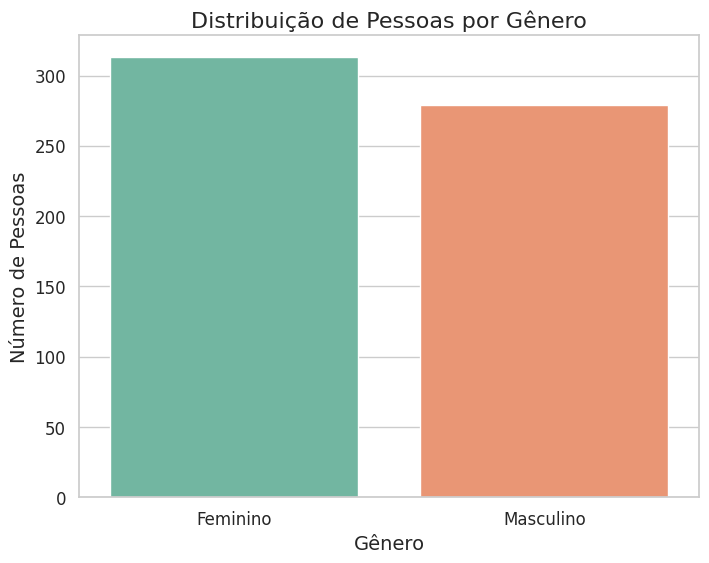

In [26]:
# Agrupar o total de pessoas por Gênero
distribuicao_genero = df.groupby('Gênero')['Total de Pessoas'].sum()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=distribuicao_genero.index, y=distribuicao_genero.values, palette='Set2')

plt.title('Distribuição de Pessoas por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Número de Pessoas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Matriz de correlação entre Cor do Cabelo, Cor dos Olhos e Gênero

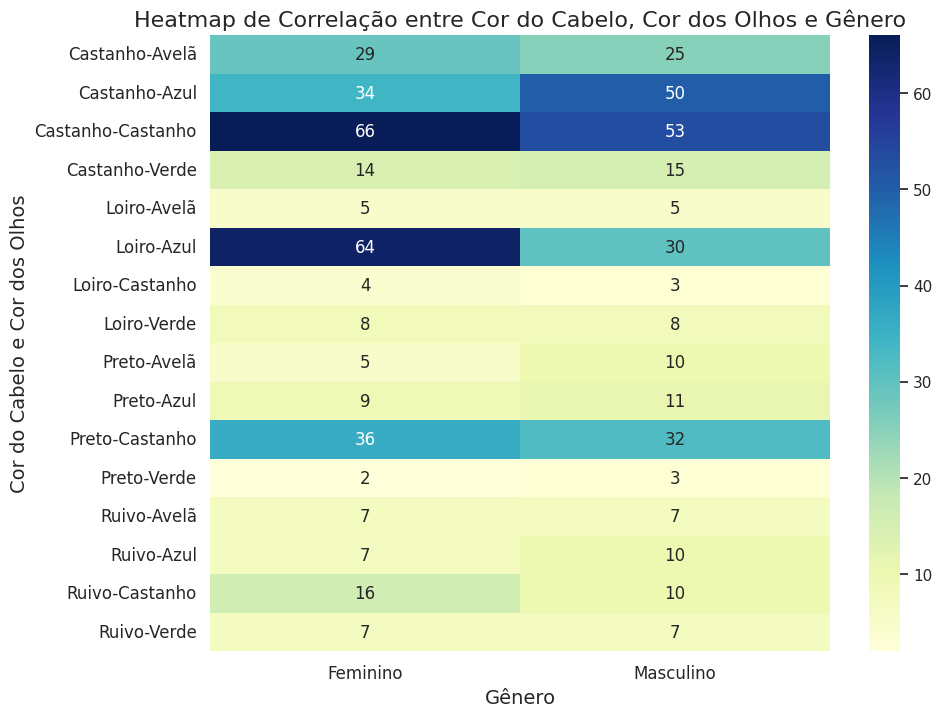

In [21]:
# Criando a tabela cruzada para correlação
tabela_cruzada = pd.crosstab(
    index=[df['Cor do Cabelo'], df['Cor dos Olhos']],
    columns=df['Gênero'],
    values=df['Total de Pessoas'],
    aggfunc='sum'
)

# Criando o heatmap com números inteiros
plt.figure(figsize=(10, 8))
sns.heatmap(tabela_cruzada, annot=True, fmt="d", cmap="YlGnBu")  # fmt="d" exibe valores inteiros
plt.title('Heatmap de Correlação entre Cor do Cabelo, Cor dos Olhos e Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Cor do Cabelo e Cor dos Olhos', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# **Desafio 3- HairEyeColor**

## 1. Número total de pessoas para cada combinação de cor de cabelo e cor dos olhos

In [37]:
combinacao_cabelo_olhos = df.groupby(['Cor do Cabelo', 'Cor dos Olhos'])['Total de Pessoas'].sum().reset_index()
print("Número total de pessoas para cada combinação de cor de cabelo e cor dos olhos:")
print(combinacao_cabelo_olhos)


Número total de pessoas para cada combinação de cor de cabelo e cor dos olhos:
   Cor do Cabelo Cor dos Olhos  Total de Pessoas
0       Castanho         Avelã                54
1       Castanho          Azul                84
2       Castanho      Castanho               119
3       Castanho         Verde                29
4          Loiro         Avelã                10
5          Loiro          Azul                94
6          Loiro      Castanho                 7
7          Loiro         Verde                16
8          Preto         Avelã                15
9          Preto          Azul                20
10         Preto      Castanho                68
11         Preto         Verde                 5
12         Ruivo         Avelã                14
13         Ruivo          Azul                17
14         Ruivo      Castanho                26
15         Ruivo         Verde                14


## 2. Cor de cabelo mais comum entre pessoas com olhos castanhos

In [33]:
castanhos = df[df['Cor dos Olhos'] == 'Castanho']
cor_cabelo_castanho = castanhos.groupby('Cor do Cabelo')['Total de Pessoas'].sum().reset_index()
cor_cabelo_castanho = cor_cabelo_castanho.sort_values(by='Total de Pessoas', ascending=False)
print(f"\nA cor de cabelo mais comum entre pessoas com olhos castanhos é: {cor_cabelo_castanho.iloc[0]['Cor do Cabelo']}")


A cor de cabelo mais comum entre pessoas com olhos castanhos é: Castanho


## 3. Tabela com a contagem total de pessoas por cor de cabelo

Index(['Cor do Cabelo', 'Número de Pessoas'], dtype='object')
Total de pessoas analisadas: 210


<ipython-input-46-56167a225d3c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cor do Cabelo', y='Número de Pessoas', data=tabela_cabelo, palette=color_map)


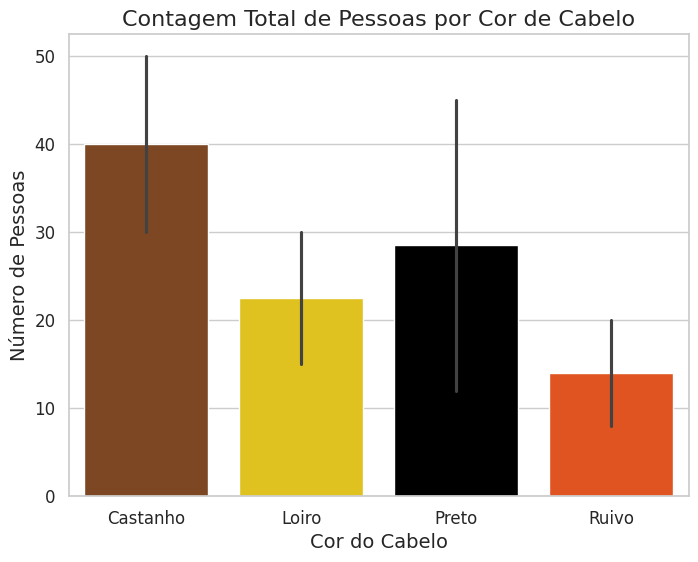

,Cor do Cabelo,Número de Pessoas
0,Castanho,30
1,Loiro,15
2,Preto,12
3,Ruivo,8
4,Castanho,50
5,Loiro,30
6,Preto,45
7,Ruivo,20


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o DataFrame 'df' já contenha as colunas:
# ['Cor do Cabelo', 'Número de Pessoas']

# Se necessário, verifique os nomes das colunas
print(df.columns)

# (Opcional) Se o DataFrame não estiver agregado, faça:
# tabela_cabelo = df.groupby('Cor do Cabelo')['Número de Pessoas'].sum().reset_index()
# Mas, neste caso, 'df' já é a tabela agregada.

tabela_cabelo = df.copy()

# Verifique o total de pessoas (deve somar 592)
total_pessoas = tabela_cabelo['Número de Pessoas'].sum()
print("Total de pessoas analisadas:", total_pessoas)

# Definindo um mapeamento de cores realistas para cada cor de cabelo
color_map = {
    'Castanho': '#8B4513',  # marrom escuro (SaddleBrown)
    'Loiro': '#FFD700',     # dourado (Gold)
    'Preto': '#000000',     # preto
    'Ruivo': '#FF4500'      # laranja avermelhado (OrangeRed)
}

# Criar o gráfico de barras com Seaborn, usando as cores definidas
plt.figure(figsize=(8, 6))
sns.barplot(x='Cor do Cabelo', y='Número de Pessoas', data=tabela_cabelo, palette=color_map)
plt.title('Contagem Total de Pessoas por Cor de Cabelo', fontsize=16)
plt.xlabel('Cor do Cabelo', fontsize=14)
plt.ylabel('Número de Pessoas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Exibir uma tabela estilizada usando o método 'style' do Pandas
styled_table = tabela_cabelo.style.set_caption("Contagem Total de Pessoas por Cor de Cabelo") \
    .background_gradient(cmap='YlOrBr')
display(styled_table)
